In [1]:
import csv
import json

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib as mpl
import seaborn as sns

import sqlite3

import numpy as np

# Reading, Cleaning and Exploring Data

Read tsv file, set the delimiter, addrees enconding error, and check out the first few rows

In [2]:
rt_reviews_df = pd.read_csv('../Data/rt.reviews.tsv',
                           delimiter='\t',
                           encoding=('unicode_escape'))
rt_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


Read the csv file movie_budgets and display it's information and first few rows

In [3]:
tnmovie = pd.read_csv('../Data/tn.movie_budgets.csv')
tnmovie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [4]:
tnmovie.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Financial data can be collected from the movie budgets csv. Our metric of box office success will be profit and return on investment (ROI) to best choose our type of movie. Start by removing the punctuation from domestic and worlwide gross and converting the values into int64. Now, add profit and percent return columns to the dataframe.

In [5]:
tnmovie['worldwide_gross'] = tnmovie['worldwide_gross'].str.replace("\$|,|\.", '', regex = True).astype('int64')

tnmovie['domestic_gross'] = tnmovie['domestic_gross'].str.replace("\$|,|\.", '', regex = True).astype('int64')

tnmovie['production_budget'] = tnmovie['production_budget'].str.replace("\$|,|\.", '', regex = True).astype('int64')

tnmovie['profit'] = tnmovie['worldwide_gross'] - tnmovie['production_budget']

tnmovie['perc_return'] = (tnmovie['profit'] / tnmovie['production_budget']) * 100

Read the im.db data with SQL and display the ERD

In [6]:
conn = sqlite3.connect('../Data/im.db')
pd.read_sql('''
SELECT
    *
FROM
    sqlite_master

''',conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


The ERD shows some tables that may have information regarding directors and actors. Select all columns for a few tables to get a sense for what they contain.

In [7]:
pd.read_sql('''
SELECT
    *
FROM
    principals
''', conn)

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [8]:
pd.read_sql('''
SELECT
    *
FROM
    persons
''', conn)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [9]:
pd.read_sql('''
SELECT
    *
FROM
    movie_basics
''', conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


# Directors SQL

Use SQL query to join tables by primary and foreign keys. This new comprehensive dataframe contains indentifying data regarding directors.

In [10]:
directors_df = pd.read_sql('''
SELECT
    category,
    pr.person_id,
    pr.movie_id,
    primary_name,
    primary_title
FROM
    principals as pr
INNER JOIN
    persons as p using(person_id)
INNER JOIN
    movie_basics as mb using(movie_id)
WHERE
    category = 'director'
''',conn)

directors_df

,category,person_id,movie_id,primary_name,primary_title
0,director,nm0398271,tt0111414,Frank Howson,A Thin Life
1,director,nm0362736,tt0323808,Robin Hardy,The Wicker Tree
2,director,nm1145057,tt0417610,Alejandro Chomski,Asleep in the Sun
3,director,nm0707738,tt0469152,Alyssa R. Bennett,Smoking/Non-Smoking
4,director,nm0776090,tt0473032,J. Neil Schulman,Escape from Heaven
...,...,...,...,...,...
146388,director,nm9728620,tt9679036,Julia Beney,"A Girl, a Boy, a Penny and a Very, Very, Very ..."
146389,director,nm10436661,tt9681728,Alexander Zolotukhin,A Russian Youth
146390,director,nm9652770,tt9689618,Xavi Herrero,Moonface. A woman in the war.
146391,director,nm10439725,tt9689618,Xavi Herrero,Moonface. A woman in the war.


# Directors Dataframe Merge

Merge the directors and tnmovie dataframes on 'primary_title' and 'movie'

In [11]:
directors_df = pd.merge(directors_df,
                  tnmovie,
                  left_on='primary_title',
                  right_on='movie')

directors_df

,category,person_id,movie_id,primary_name,primary_title,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,perc_return
0,director,nm0001053,tt0475290,Ethan Coen,"Hail, Caesar!",22,"Feb 5, 2016","Hail, Caesar!",22000000,30080225,64160680,42160680,191.639455
1,director,nm0001054,tt0475290,Joel Coen,"Hail, Caesar!",22,"Feb 5, 2016","Hail, Caesar!",22000000,30080225,64160680,42160680,191.639455
2,director,nm10678795,tt10300704,Anbarasan,Walter,96,"Mar 13, 2015",Walter,700000,0,0,-700000,-100.000000
3,director,nm1457361,tt2016335,Anna Mastro,Walter,96,"Mar 13, 2015",Walter,700000,0,0,-700000,-100.000000
4,director,nm6315709,tt3558672,Daniela Imhoff,Walter,96,"Mar 13, 2015",Walter,700000,0,0,-700000,-100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3864,director,nm0619110,tt7961060,Tatsuya Nagamine,Dragon Ball Super: Broly,36,"Jan 16, 2019",Dragon Ball Super: Broly,8500000,30376755,122747755,114247755,1344.091235
3865,director,nm3258280,tt6962340,Anand Vrs Tomar,The Touch,10,"Mar 31, 2004",The Touch,20000000,0,5918742,-14081258,-70.406290
3866,director,nm4991904,tt9805168,Janchivdorj Sengedorj,Traitor,25,"Aug 27, 2008",Traitor,22000000,23530831,27882226,5882226,26.737391
3867,director,nm9457387,tt7694546,Zefei Liu,Beowulf,88,"Nov 16, 2007",Beowulf,150000000,82280579,195080579,45080579,30.053719


# Directors by Profit

Count the how many times a name appears in the 'primary_name' column and sort it. These directors have all directed at least 5 films.

In [12]:
directors_5_films = directors_df.value_counts('primary_name').head(28)

directors_5_films

primary_name
Tim Story             9
David Gordon Green    8
Steven Spielberg      8
Steven Soderbergh     7
Ridley Scott          7
Clint Eastwood        6
Tim Burton            6
Peter Berg            6
Jaume Collet-Serra    6
Denis Villeneuve      6
Jon M. Chu            6
Guillermo del Toro    5
Ron Howard            5
Robert Rodriguez      5
David O. Russell      5
Roland Emmerich       5
Francis Lawrence      5
Zack Snyder           5
Simon West            5
Nicholas Stoller      5
Brad Peyton           5
Paul W.S. Anderson    5
Paul Feig             5
Jonathan Levine       5
Antoine Fuqua         5
Danny Boyle           5
David Ayer            5
M. Night Shyamalan    5
dtype: int64

Make a list of director names using index.

In [13]:
directors_5_films = list(directors_5_films.index)

directors_5_films

['Tim Story',
 'David Gordon Green',
 'Steven Spielberg',
 'Steven Soderbergh',
 'Ridley Scott',
 'Clint Eastwood',
 'Tim Burton',
 'Peter Berg',
 'Jaume Collet-Serra',
 'Denis Villeneuve',
 'Jon M. Chu',
 'Guillermo del Toro',
 'Ron Howard',
 'Robert Rodriguez',
 'David O. Russell',
 'Roland Emmerich',
 'Francis Lawrence',
 'Zack Snyder',
 'Simon West',
 'Nicholas Stoller',
 'Brad Peyton',
 'Paul W.S. Anderson',
 'Paul Feig',
 'Jonathan Levine',
 'Antoine Fuqua',
 'Danny Boyle',
 'David Ayer',
 'M. Night Shyamalan']

Iterate through the directors_5_films. Next, locate the rows and columns where the 'primary_name' is equal to the director's name. Then, append the average profit for each movie the director directed in to a new list.

In [14]:
avg_dir = []

for director in directors_5_films:
    directors_filtered = directors_df.loc[directors_df['primary_name'] == director]
    avg_dir.append(directors_filtered.profit.mean())
    
avg_dir

[48457857.44444445,
 42364834.5,
 164754974.375,
 45581726.85714286,
 176967321.2857143,
 137916026.66666666,
 190861143.33333334,
 34929965.833333336,
 75478617.16666667,
 57327861.166666664,
 150242933.66666666,
 97190623.6,
 62628345.4,
 48152771.4,
 113364526.0,
 40345984.4,
 404238308.6,
 294184022.8,
 38949677.2,
 104627034.8,
 185171680.0,
 153293991.0,
 174341927.8,
 33089379.4,
 98183459.2,
 24089305.2,
 127467723.4,
 176831934.6]

Create a dataframe using zip with the directors_5_films and average profit lists

In [15]:
directing_df = pd.DataFrame(list(zip(directors_5_films, avg_dir)),
               columns =['director_name', 'average_profit'])

Sort the dataframe by 'average_profit'

In [16]:
directing_df.sort_values(by='average_profit', inplace=True, ascending=False)

# Directors by Average Profit - Data Visualization

Create a barh using seaborn with the average profit for each movie the director directed on the x-axis and the director name column on the y-axis. Change x-axis units from scientific notation to easily readable numbers.

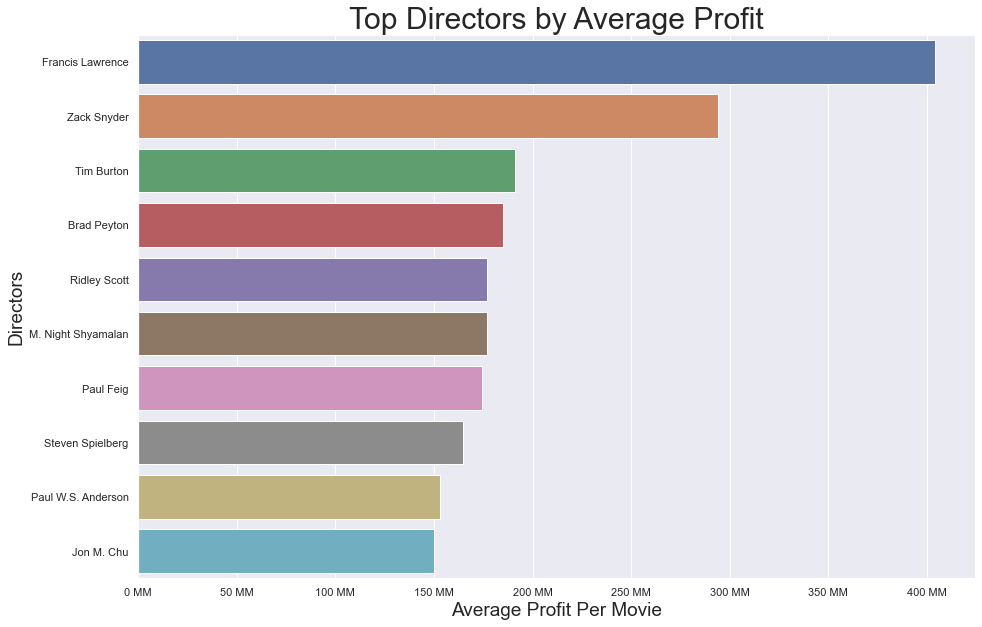

In [17]:
sns.set(style="white")

sns.color_palette("rocket")

sns.set(rc = {'figure.figsize':(15,10)})

g = sns.barplot(x='average_profit', y='director_name', data=directing_df.head(10))

plt.title('Top Directors by Average Profit', fontsize=30)
plt.xlabel('Average Profit Per Movie', fontsize=19)
plt.ylabel('Directors', fontsize=19)

ticks_loc = g.get_xticks().tolist()
g.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
label_format = '{:,.0f}'
g.set_xticklabels([label_format.format(x) for x in ticks_loc])

xlabels = [label_format.format(x) + ' MM' for x in g.get_xticks()/1000000]
g.set_xticklabels(xlabels);

# Directors by Average ROI

Iterate through the directors_5_films list. Next, locate the rows and columns where the 'primary_name' is equal to the director's name. Then, append the average roi for each movie the director directed in to a new list.

In [18]:
roi_dir = []

for director in directors_5_films:
    directors_filtered_roi = directors_df.loc[directors_df['primary_name'] == director]
    roi_dir.append(directors_filtered_roi.perc_return.mean())
    
roi_dir[:10]

[447.232163208935,
 3008.753912141026,
 269.38971408287546,
 495.8500494757723,
 169.91936647487856,
 258.40888381773397,
 125.95812915057819,
 56.06421442127317,
 263.03376573908525,
 132.84530124386617]

Create a dataframe using zip with the top directors and average roi lists

In [19]:
directing_df_roi = pd.DataFrame(list(zip(directors_5_films, roi_dir)),
               columns =['director_name', 'average_roi'])

Sort the dataframe by 'average_roi'

In [20]:
directing_df_roi.sort_values(by='average_roi', inplace=True, ascending=False)

# Directors by Average ROI - Data Visualization

Create a barh using seaborn with the average roi column on the x-axis and the director name column on the y-axis. Change x-axis units from scientific notation to easily readable numbers.

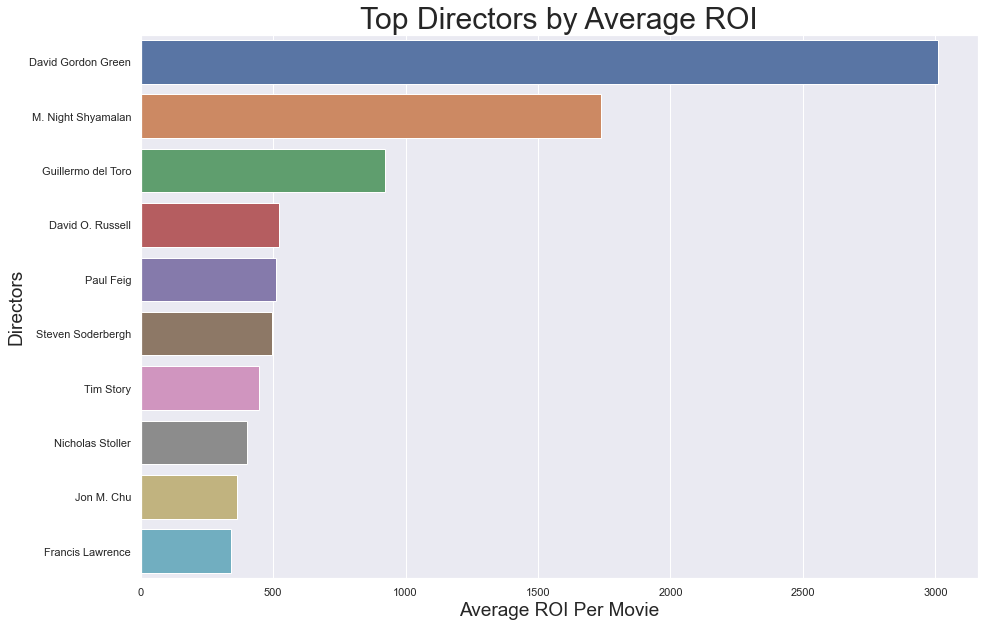

In [21]:
sns.set(style="white")

sns.color_palette("rocket")

sns.set(rc = {'figure.figsize':(15,10)})

g = sns.barplot(x='average_roi', y='director_name', data=directing_df_roi.head(10))

plt.title('Top Directors by Average ROI', fontsize=30)
plt.xlabel('Average ROI Per Movie', fontsize=19)
plt.ylabel('Directors', fontsize=19);

# Findings

Directors draw in audiences! Steven Spielbergs, Tim Burtons, and Ridley Scotts 
create universes that pull over $150 million in box office. These directors have unqiue, 
beloved fimlamking styles. And their fans come out in droves to experience them in theaters. 
Sometimes multiple times. With one these visionaries at the helm, Microsoft may likley produce 
an instant classic and a blockbuster hit at the same time.

# Actors SQL

Use SQL query to join tables by primary and foreign keys. This new comprehensive dataframe contains indentifying data regarding actors.

In [22]:
actors = pd.read_sql('''
SELECT
    category,
    pr.person_id,
    pr.movie_id,
    primary_name,
    primary_title
FROM
    principals as pr
INNER JOIN
    persons as p using(person_id)
INNER JOIN
    movie_basics as mb using(movie_id)
WHERE
    category = 'actor' 
    or
    category = 'actress'
''', conn)

actors

,category,person_id,movie_id,primary_name,primary_title
0,actor,nm0246005,tt0111414,Tommy Dysart,A Thin Life
1,actress,nm3579312,tt0323808,Brittania Nicol,The Wicker Tree
2,actor,nm2694680,tt0323808,Henry Garrett,The Wicker Tree
3,actor,nm0574615,tt0323808,Graham McTavish,The Wicker Tree
4,actress,nm0502652,tt0323808,Jacqueline Leonard,The Wicker Tree
...,...,...,...,...,...
402680,actor,nm10397910,tt9681728,Danil Tyabin,A Russian Youth
402681,actor,nm10439726,tt9689618,Christian Lacroix,Moonface. A woman in the war.
402682,actor,nm10439727,tt9689618,Christine Spengler,Moonface. A woman in the war.
402683,actor,nm10439724,tt9689618,Phillippe Warner,Moonface. A woman in the war.


# Actors Dataframe Merge

Merge the actors and tnmovie dataframes on 'primary_title' and 'movie'

In [23]:
actors_df = pd.merge(actors,
                  tnmovie,
                  left_on='primary_title',
                  right_on='movie')

actors_df

,category,person_id,movie_id,primary_name,primary_title,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,perc_return
0,actor,nm0000982,tt0475290,Josh Brolin,"Hail, Caesar!",22,"Feb 5, 2016","Hail, Caesar!",22000000,30080225,64160680,42160680,191.639455
1,actor,nm0000123,tt0475290,George Clooney,"Hail, Caesar!",22,"Feb 5, 2016","Hail, Caesar!",22000000,30080225,64160680,42160680,191.639455
2,actor,nm2403277,tt0475290,Alden Ehrenreich,"Hail, Caesar!",22,"Feb 5, 2016","Hail, Caesar!",22000000,30080225,64160680,42160680,191.639455
3,actor,nm0000146,tt0475290,Ralph Fiennes,"Hail, Caesar!",22,"Feb 5, 2016","Hail, Caesar!",22000000,30080225,64160680,42160680,191.639455
4,actor,nm0006763,tt10300704,Jackie Shroff,Walter,96,"Mar 13, 2015",Walter,700000,0,0,-700000,-100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13362,actor,nm10487076,tt9805168,E. Iderbold,Traitor,25,"Aug 27, 2008",Traitor,22000000,23530831,27882226,5882226,26.737391
13363,actor,nm10480867,tt9805168,N. Yalalt,Traitor,25,"Aug 27, 2008",Traitor,22000000,23530831,27882226,5882226,26.737391
13364,actor,nm10487077,tt9805168,A. Önörjargal,Traitor,25,"Aug 27, 2008",Traitor,22000000,23530831,27882226,5882226,26.737391
13365,actor,nm9457389,tt7694546,Dongchao Tai,Beowulf,88,"Nov 16, 2007",Beowulf,150000000,82280579,195080579,45080579,30.053719


# Actors by Average Profit

Count the how many times a name appears in the 'primary_name' column and sort it. These actors have all starred in at least 15 films.

In [24]:
actors_15_films = actors_df.value_counts('primary_name').head(18)

actors_15_films

primary_name
Mark Wahlberg          19
Dwayne Johnson         19
Robert De Niro         18
Liam Neeson            18
Steve Carell           17
Channing Tatum         17
Joel Edgerton          17
Kevin Hart             16
Johnny Depp            16
Matthew McConaughey    16
Nicolas Cage           15
Michael Fassbender     15
Anna Kendrick          15
Tom Hardy              15
Jennifer Lawrence      15
Owen Wilson            15
Nicole Kidman          15
Chris Hemsworth        15
dtype: int64

Make a list of actor names using index.

In [25]:
actors_15_films = list(actors_15_films.index)

actors_15_films

['Mark Wahlberg',
 'Dwayne Johnson',
 'Robert De Niro',
 'Liam Neeson',
 'Steve Carell',
 'Channing Tatum',
 'Joel Edgerton',
 'Kevin Hart',
 'Johnny Depp',
 'Matthew McConaughey',
 'Nicolas Cage',
 'Michael Fassbender',
 'Anna Kendrick',
 'Tom Hardy',
 'Jennifer Lawrence',
 'Owen Wilson',
 'Nicole Kidman',
 'Chris Hemsworth']

Iterate through the actors_15_films list. Next, locate the rows and columns where the 'primary_name' is equal to the actors's name. Then, append the average profit for each movie the actor appeared in to a new list.

In [26]:
avg_actor = []

for actor in actors_15_films:
    actors_filtered = actors_df.loc[actors_df['primary_name'] == actor]
    avg_actor.append(actors_filtered.profit.mean())
    
avg_actor[:10]

[137891808.0526316,
 329997202.68421054,
 53687091.777777776,
 104063632.1111111,
 166251075.47058824,
 107753628.64705883,
 29842502.94117647,
 166645292.0625,
 184810854.8125,
 103858957.625]

Create a dataframe using zip with the actors_15_films and average profit lists

In [27]:
acting_df = pd.DataFrame(list(zip(actors_15_films, avg_actor)),
               columns =['actor_name', 'average_profit'])

Sort the dataframe by 'average_profit'

In [28]:
acting_df.sort_values(by='average_profit', inplace=True, ascending=False)

# Actors by Average Profit - Data Visualization

Create a barh using seaborn with the average profit column on the x-axis and the actors name column on the y-axis. Change x-axis units from scientific notation to easily readable numbers.

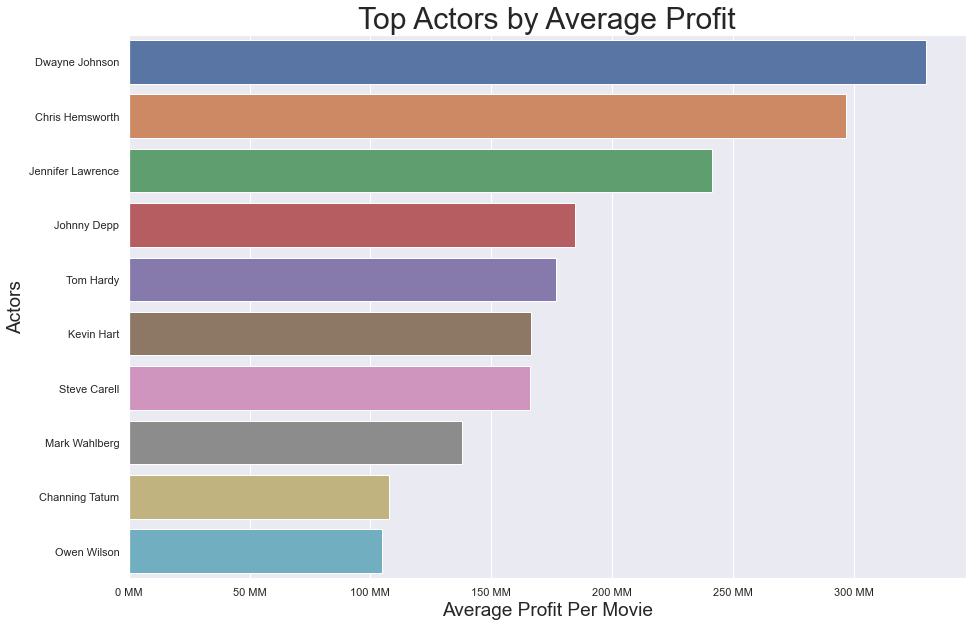

In [29]:
sns.set(style="white")

sns.color_palette("rocket")

sns.set(rc = {'figure.figsize':(15,10)})

g = sns.barplot(x='average_profit', y='actor_name', data=acting_df.head(10))

plt.title('Top Actors by Average Profit', fontsize=30)
plt.xlabel('Average Profit Per Movie', fontsize=19)
plt.ylabel('Actors', fontsize=19)

plt.ticklabel_format(axis='x', style='plain')
ticks_loc = g.get_xticks().tolist()
g.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
label_format = '{:,.0f}'
g.set_xticklabels([label_format.format(x) for x in ticks_loc])

xlabels = [label_format.format(x) + ' MM' for x in g.get_xticks()/1000000]
g.set_xticklabels(xlabels);

# Actors by Average ROI

Iterate through the actors_15_films list. Next, locate the rows and columns where the 'primary_name' is equal to the actors's name. Then, append the average roi for each movie the actor appeared in to a new list.

In [30]:
roi_actors = []

for actor in actors_15_films:
    actors_filtered = actors_df.loc[actors_df['primary_name'] == actor]
    roi_actors.append(actors_filtered.perc_return.mean())
    
roi_actors[:10]

[220.07803967064754,
 289.01994173783544,
 189.21015841118154,
 195.51779717731222,
 283.3224443505285,
 346.1925827072439,
 142.9695506168023,
 357.09608849377196,
 78.13170186181293,
 317.55942889652016]

Create a dataframe using zip with the actors_15_films and average roi lists

In [31]:
acting_df_roi = pd.DataFrame(list(zip(actors_15_films, roi_actors)),
               columns =['actor_name', 'average_roi'])

Sort the dataframe by 'average_roi'

In [32]:
acting_df_roi.sort_values(by='average_roi', inplace=True, ascending=False)

# Actors by Average ROI - Data Visualization

Create a barh using seaborn with the average profit column on the x-axis and the actor name column on the y-axis. Change x-axis units from scientific notation to easily readable numbers.

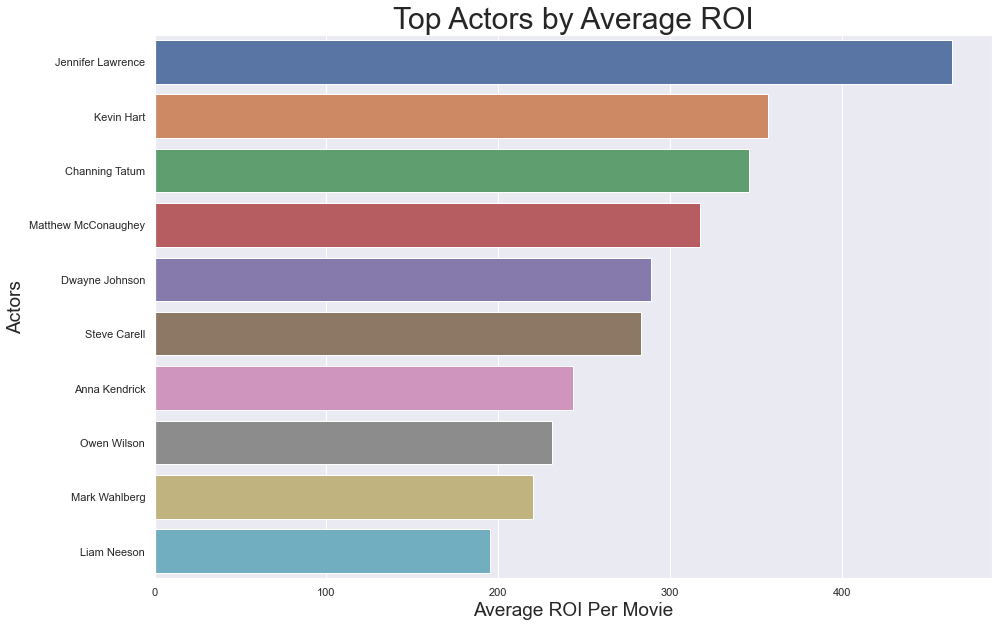

In [33]:
sns.set(style="white")

sns.color_palette("rocket")

sns.set(rc = {'figure.figsize':(15,10)})

g = sns.barplot(x='average_roi', y='actor_name', data=acting_df_roi.head(10))

plt.title('Top Actors by Average ROI', fontsize=30)
plt.xlabel('Average ROI Per Movie', fontsize=19)
plt.ylabel('Actors', fontsize=19);

# Findings

Movie star appeal is a major box office draw! Actors like Dwayne Johnson, Jennifer Lawrence, and Kevin Hart not only makes us laugh and cry, they also inspire us. These actors average over $150 million per film because they have an army of die-hard fans always ready to invade the next midnight premiere. Casting one these stars in a Microsoft movie, may likley drive high box office sales.

# Next Steps

We would like to explore the relationship between directors and actors and genres. Entertainment goliaths like Marvel and DC are exclusively held but Microsoft could hire an acclaimed director and produce their own rival franchises based on widely consumed source materials with an already rabid fan base. For example, someone like Denis Villeneuve (directed Dune) may be a great fit for this role. Establishing such a foothold could boost box office sales, grow viewership, and bolster the prestige of the fledgling studio.